## INTRODUCTION
### Road accidents pose a significant threat to public health and safety worldwide.According to the World Health Organization (WHO), approximately 1.3 million people die annually due to road traffic accidents, with many more suffering injuries or disabilities.
#### This analysis aims to explore the trends and factors contributing to road accidents in a Country using Dataset. By examining various parameters such as accident frequency, severity, location, weather conditions, vehicle type, and junction control,

In [4]:
import pandas as pd
df=pd.read_csv('C:Road Accident Data.csv')
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [20]:

df.describe()

,Accident_date,Latitude,Longitude,Number_of_casualties,Number_of_vehicles,Speed_limit,Year
count,300495,300495.000000,300495.000000,300495.000000,300495.000000,300495.000000,300495.000000
mean,2021-12-24 08:36:03.054959104,52.485315,-1.361882,1.359450,1.830516,38.932595,2021.469891
min,2021-01-01 00:00:00,49.914488,-7.516225,1.000000,1.000000,10.000000,2021.000000
25%,2021-06-29 00:00:00,51.484856,-2.241658,1.000000,1.000000,30.000000,2021.000000
50%,2021-12-09 00:00:00,52.212267,-1.341197,1.000000,2.000000,30.000000,2021.000000
75%,2022-06-25 00:00:00,53.415903,-0.203736,1.000000,2.000000,50.000000,2022.000000
max,2022-12-31 00:00:00,60.598055,1.759398,48.000000,32.000000,70.000000,2022.000000
std,NaN,1.341351,1.354014,0.818281,0.711747,14.062455,0.499093


In [21]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})  # To replace the space and capitalize the column name

In [22]:
df.isnull().sum()

Accident_index                0
Accident_date                 0
Day_of_week                   0
Junction_control              0
Junction_detail               0
Accident_severity             0
Latitude                      0
Light_conditions              0
Local_authority_(district)    0
Longitude                     0
Number_of_casualties          0
Number_of_vehicles            0
Police_force                  0
Road_surface_conditions       0
Road_type                     0
Speed_limit                   0
Time                          0
Urban_or_rural_area           0
Weather_conditions            0
Vehicle_type                  0
Year                          0
dtype: int64

In [8]:
df=df.dropna(subset='Time')
df=df.dropna(subset="Road_type")
df=df.dropna(subset='Road_surface_conditions')
df=df.dropna(subset='Weather_conditions')    # To delete null values
df = df.drop('Carriageway_hazards', axis=1)  # To  delete column 
df.isnull().sum()

Accident_index                0
Accident_date                 0
Day_of_week                   0
Junction_control              0
Junction_detail               0
Accident_severity             0
Latitude                      0
Light_conditions              0
Local_authority_(district)    0
Longitude                     0
Number_of_casualties          0
Number_of_vehicles            0
Police_force                  0
Road_surface_conditions       0
Road_type                     0
Speed_limit                   0
Time                          0
Urban_or_rural_area           0
Weather_conditions            0
Vehicle_type                  0
dtype: int64

In [24]:
df['Accident_date']=pd.to_datetime(df['Accident_date'])

### 1 Which day of the week has the highest number of accidents?


Day_of_week
Friday       49287
Wednesday    45331
Tuesday      45221
Thursday     44495
Monday       42855
Saturday     40546
Sunday       32760
Name: count, dtype: int64


C:\Users\user 2\AppData\Local\Temp\ipykernel_1772\1675198296.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_week', y='Accidents', data=accidents_per_day,palette='viridis_r', edgecolor='black')


<Axes: title={'center': 'Highest number of accidents in week'}, xlabel='Day_of_week', ylabel='Accidents'>

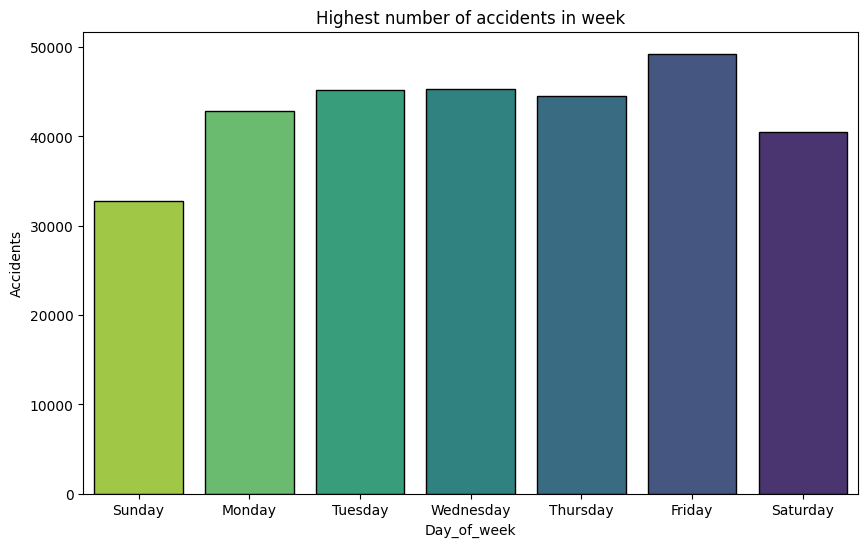

In [10]:

accidents_per_day = df['Day_of_week'].value_counts()
print(accidents_per_day)
day_with_most_accidents = accidents_per_day.idxmax()
max_accidents = accidents_per_day.max()

import seaborn as sns
import matplotlib.pyplot as plt

# Define day order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Calculate accidents per day
accidents_per_day = df['Day_of_week'].value_counts()

# Convert to DataFrame and reorder
accidents_per_day = accidents_per_day.to_frame('Accidents').reset_index()
accidents_per_day['Day_of_week'] = pd.Categorical(accidents_per_day['Day_of_week'], categories=day_order, ordered=True)
accidents_per_day = accidents_per_day.sort_values('Day_of_week')


#chart
plt.figure(figsize=(10, 6))
plt.title('Highest number of accidents in week')
sns.barplot(x='Day_of_week', y='Accidents', data=accidents_per_day,palette='viridis_r', edgecolor='black')
#winter_r,viridis_r,set20




### Sunday is the day with least accident ,That could be due to decreased traffic and  the fact that sunday is a hollyday 

average speed limit= 38.932594552322


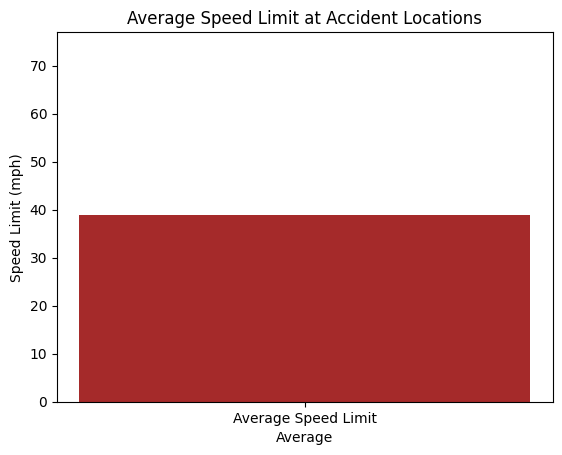

In [25]:
# 2) What is the average speed limit at accident locations?

average_speed_limit = df['Speed_limit'].mean()
print('average speed limit=',average_speed_limit)


plt.bar(1, average_speed_limit, color='brown')  # Single bar
plt.title('Average Speed Limit at Accident Locations')
plt.xlabel('Average')
plt.ylabel('Speed Limit (mph)')
plt.xticks([1], ['Average Speed Limit'])  # Set x-axis label
plt.ylim(0, max(df['Speed_limit']) * 1.1)  # Set y-axis limits
plt.show()




### Most accident occur at relatively low speeds

In [38]:
df.head(3)

,Accident_index,Accident_date,Day_of_week,Junction_control,Junction_detail,Accident_severity,Latitude,Light_conditions,Local_authority_(district),Longitude,Number_of_casualties,Number_of_vehicles,Police_force,Road_surface_conditions,Road_type,Speed_limit,Time,Urban_or_rural_area,Weather_conditions,Vehicle_type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car


Urban_or_rural_area
Urban    193341
Rural    107154
Name: count, dtype: int64


C:\Users\user 2\AppData\Local\Temp\ipykernel_720\2946780353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_rural_urban.index, y=accident_rural_urban.values,palette='Set2', edgecolor='black')


<Axes: title={'center': 'Rural v/s Urban'}, xlabel='Urban_or_rural_area'>

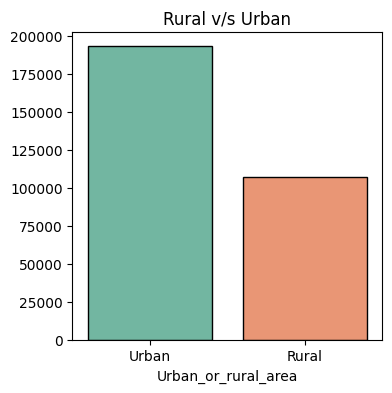

In [10]:
# 3) How many accidents occur in urban vs. rural areas?
accident_rural_urban=df['Urban_or_rural_area'].value_counts()
print(accident_rural_urban)

# Plot bar chart using Seaborn
plt.figure(figsize=(4, 4))
plt.title('Rural v/s Urban')
sns.barplot(x=accident_rural_urban.index, y=accident_rural_urban.values,palette='Set2', edgecolor='black')
#winter_r,tab20,muted,husl,nipy_spectral,Paired,spring_r,viridis_r,Set2,



### Most accident occured in urban areas compared to rural areas ,the reasons may be 
###  increased traffic density
###  higher population density 
###  increased vehicle speed

## 4) What are the most common weather conditions during accidents?

Weather_conditions
Fine no high winds       243333
Raining no high winds     34733
Other                      8752
Snowing no high winds      4815
Raining + high winds       3508
Fine + high winds          3136
Fog or mist                1681
Snowing + high winds        537
Name: count, dtype: int64


C:\Users\user 2\AppData\Local\Temp\ipykernel_720\2937912752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather.index, y=weather.values, palette='winter_r', edgecolor='black')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fine no high winds'),
  Text(1, 0, 'Raining no high winds'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Snowing no high winds'),
  Text(4, 0, 'Raining + high winds'),
  Text(5, 0, 'Fine + high winds'),
  Text(6, 0, 'Fog or mist'),
  Text(7, 0, 'Snowing + high winds')])

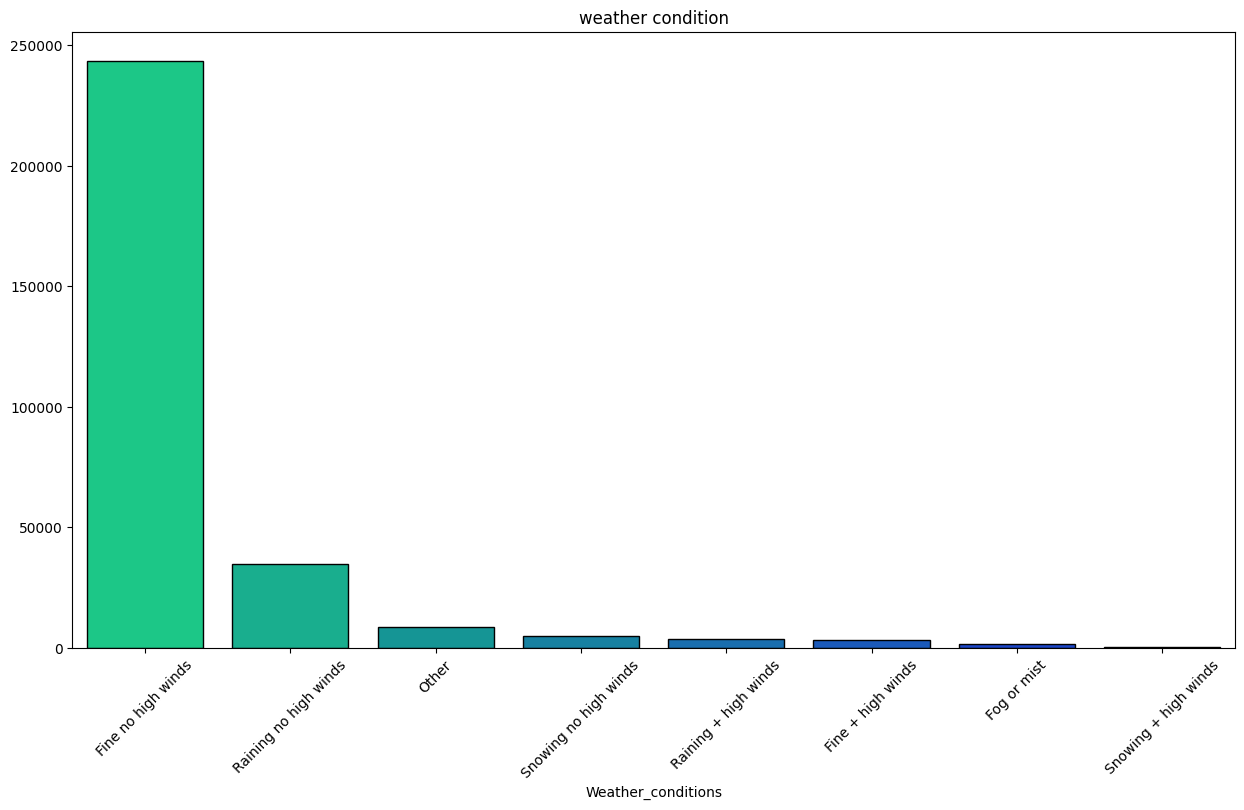

In [11]:

df.head(3)
weather=df['Weather_conditions'].value_counts()
print(weather)


plt.figure(figsize=(15, 8))
plt.title('weather condition')
sns.barplot(x=weather.index, y=weather.values, palette='winter_r', edgecolor='black')
plt.xticks(rotation=45)

### Most accidents occur in 'fine no high winds' weather conditions

## 5) Do junction controls reduce the severity of accidents?

Junction_control                     Accident_severity
Authorised person                    Fatal                     2
                                     Serious                  41
                                     Slight                  406
Auto traffic sigl                    Serious                  10
                                     Slight                   79
Auto traffic signal                  Fatal                   279
                                     Fetal                    17
                                     Serious                3239
                                     Slight                27936
Data missing or out of range         Fatal                  1873
                                     Fetal                     8
                                     Serious               14723
                                     Slight                78823
Give way or uncontrolled             Fatal                  1189
                                   

<Axes: title={'center': 'Junction control v/s Accident'}, xlabel='Junction_control', ylabel='count'>

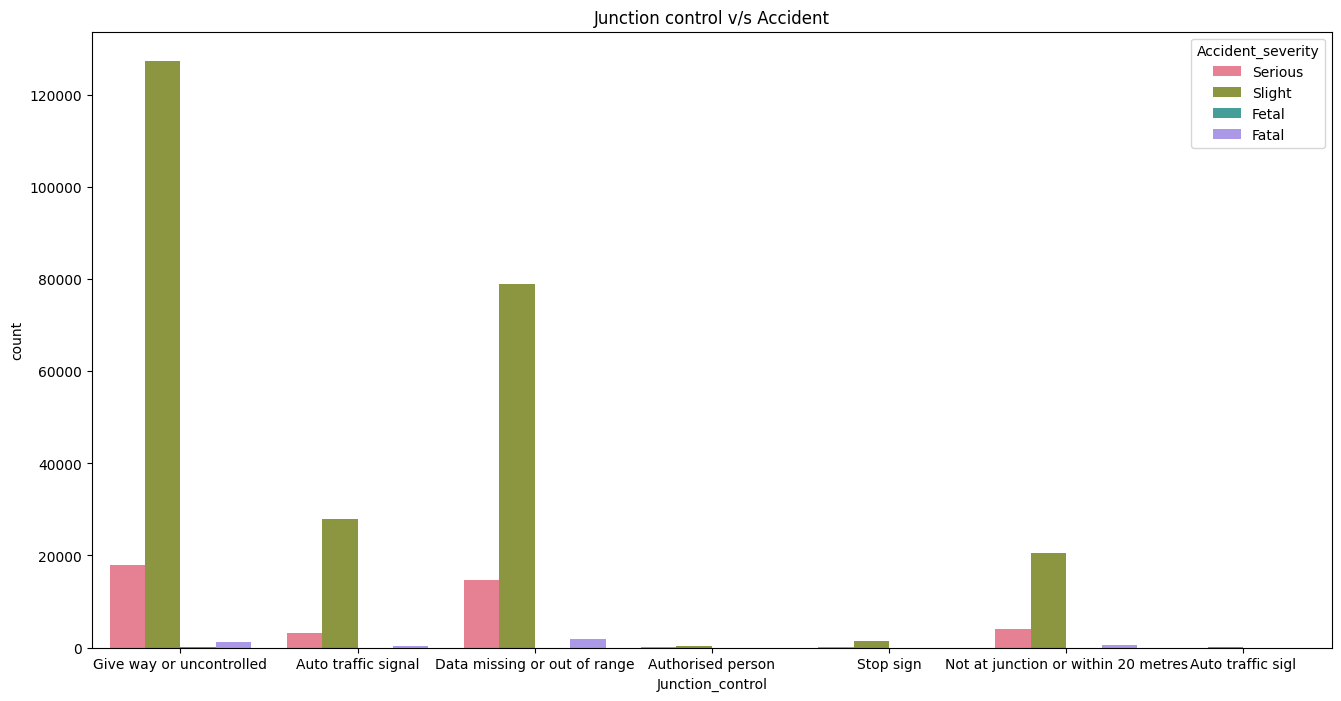

In [13]:


junction_control_severity = df.groupby(['Junction_control', 'Accident_severity']).size()
print(junction_control_severity)


"""plt.figure(figsize=(10, 6))
junction_control_severity.plot(kind='bar')
plt.title('weather condition during accident')
plt.xlabel('weather')
plt.ylabel('Number of Accidents')"""


plt.figure(figsize=(16, 8))
plt.title('Junction control v/s Accident')
sns.countplot(x='Junction_control', hue='Accident_severity', data=df, palette='husl')


#winter_r,tab20,muted,husl,nipy_spectral,Paired,spring_r,viridis_r,Set2,

### Most accident occured at "give way or Uncontrolled" junctions

## 6) How does weather affect the number of casualties?

Weather_conditions
Fine + high winds        1.378827
Fine no high winds       1.351555
Fog or mist              1.427127
Other                    1.360375
Raining + high winds     1.400513
Raining no high winds    1.407163
Snowing + high winds     1.418994
Snowing no high winds    1.339772
Name: Number_of_casualties, dtype: float64


C:\Users\user 2\AppData\Local\Temp\ipykernel_720\3341051943.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_casualties.index, y=weather_casualties.values, palette='Set2', edgecolor='black')


<Axes: title={'center': 'weather v/s casuality'}, xlabel='Weather_conditions'>

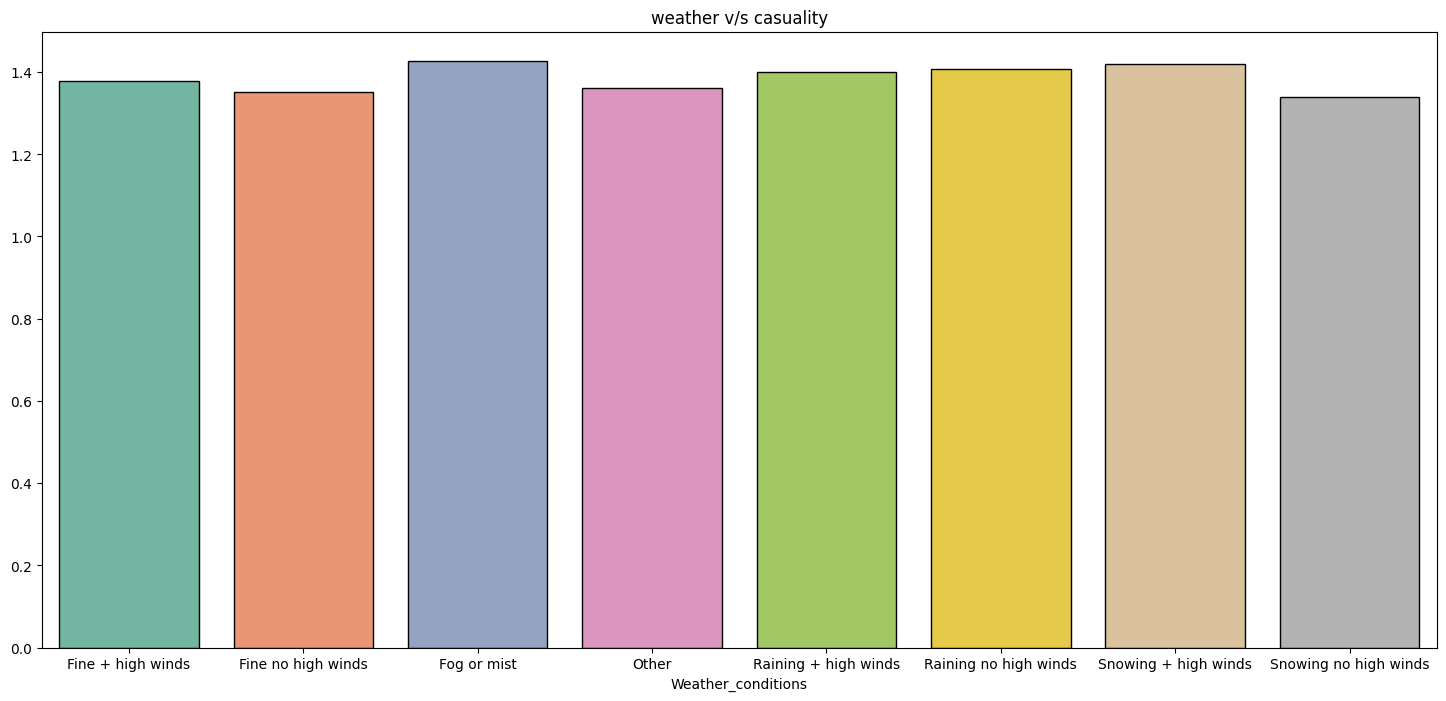

In [21]:


weather_casualties = df.groupby('Weather_conditions')['Number_of_casualties'].mean()
print(weather_casualties)

plt.figure(figsize=(18, 8))
plt.title('weather v/s casuality')
sns.barplot(x=weather_casualties.index, y=weather_casualties.values, palette='Set2', edgecolor='black')


### Serious accident occur at similar rates across most weather conditions  Fog/mist , raining and  snowing  conditions have a slightly higher rate of serious accidents

## 7) Does increasing speed limit lead to more severe accidents?

<Axes: title={'center': 'Speed v/s Accident'}, xlabel='Speed_limit', ylabel='count'>

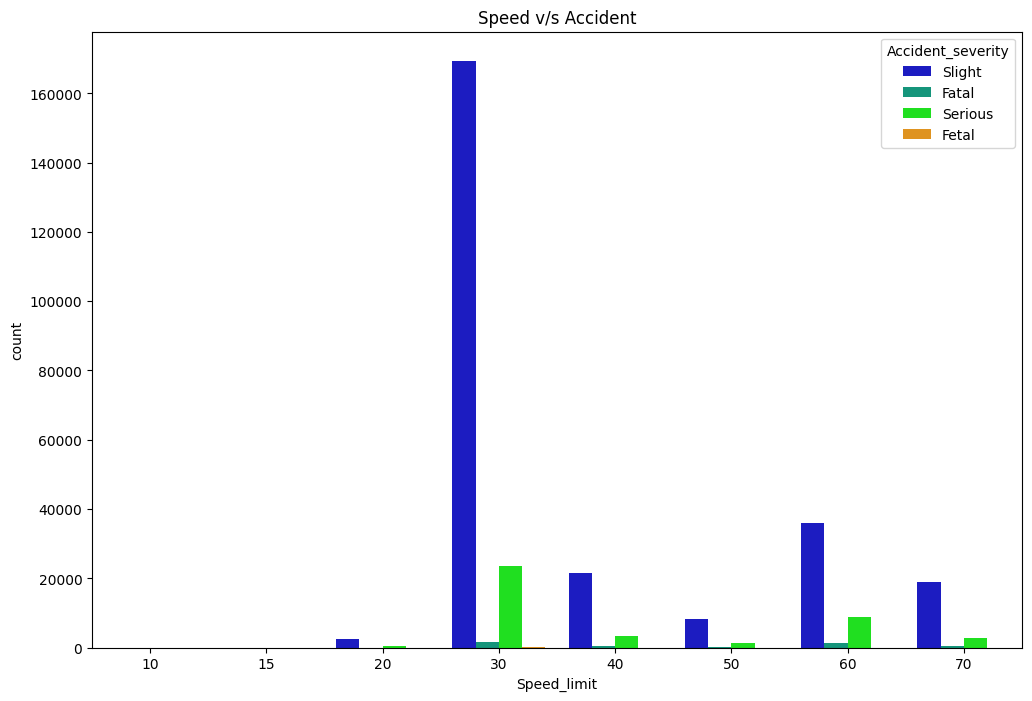

In [67]:

import seaborn as sns
import matplotlib.pyplot as plt
accident_severity_by_speed = df.groupby(['Speed_limit', 'Accident_severity']).size()



plt.figure(figsize=(12, 8))
plt.title('Speed v/s Accident')
sns.countplot(x='Speed_limit', hue='Accident_severity', data=df, palette='nipy_spectral')



### Increasing speed limit leads to more accident

Junction_control                     Accident_severity
Authorised person                    Fatal                     2
                                     Serious                  41
                                     Slight                  406
Auto traffic sigl                    Serious                  10
                                     Slight                   79
Auto traffic signal                  Fatal                   279
                                     Fetal                    17
                                     Serious                3239
                                     Slight                27936
Data missing or out of range         Fatal                  1873
                                     Fetal                     8
                                     Serious               14723
                                     Slight                78823
Give way or uncontrolled             Fatal                  1189
                                   

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Give way or uncontrolled'),
  Text(1, 0, 'Auto traffic signal'),
  Text(2, 0, 'Data missing or out of range'),
  Text(3, 0, 'Authorised person'),
  Text(4, 0, 'Stop sign'),
  Text(5, 0, 'Not at junction or within 20 metres'),
  Text(6, 0, 'Auto traffic sigl')])

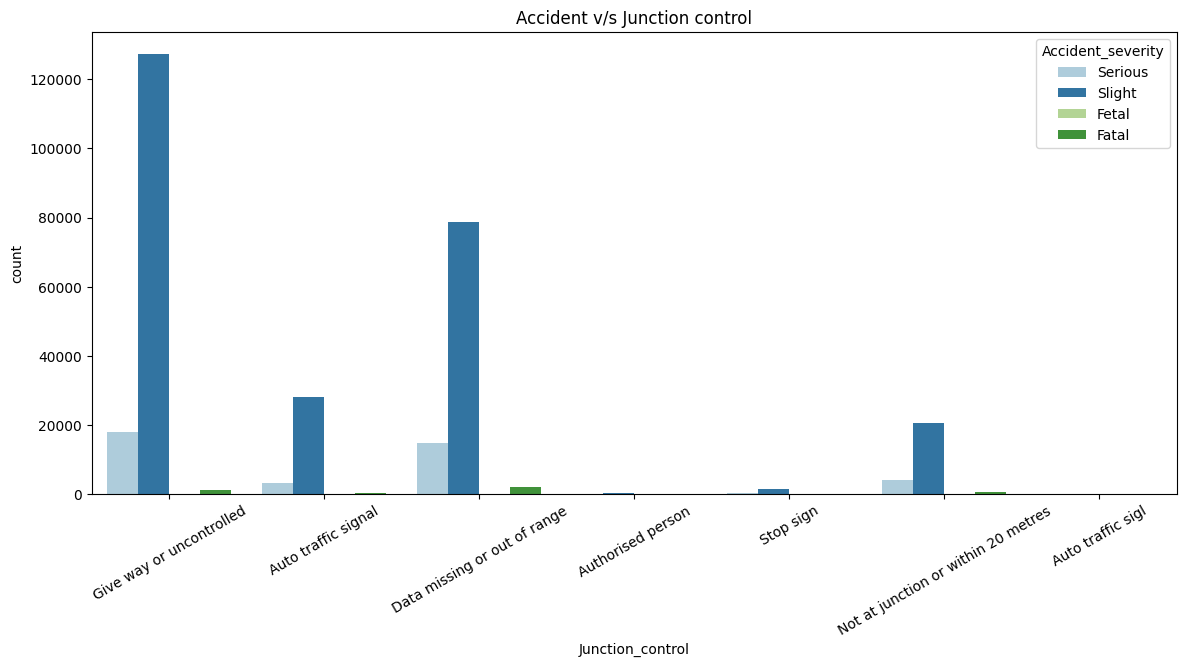

In [75]:
#8) Do junction controls reduce accident severity?
junction_control_accident_severity = df.groupby(['Junction_control', 'Accident_severity']).size()
print(junction_control_accident_severity)

plt.figure(figsize=(14, 6))
plt.title('Accident v/s Junction control')
sns.countplot(x='Junction_control', hue='Accident_severity', data=df, palette='Paired')
plt.xticks(rotation=30)



 ### Most accidents occur at give_way or uncontrolled intersections ,autotraffic signal and authorised person has fewer accidents 
 ### Every junction control has accidents but frequency  varies.

## 9) Does vehicle type influence accident severity?

Vehicle_type                           Accident_severity
Agricultural vehicle                   Fatal                     6
                                       Fetal                     1
                                       Serious                 100
                                       Slight                  609
Bus or coach (17 or more pass seats)   Fatal                    83
                                       Serious                1122
                                       Slight                 7292
Car                                    Fatal                  3053
                                       Fetal                    35
                                       Serious               31089
                                       Slight               199788
Goods 7.5 tonnes mgw and over          Fatal                    62
                                       Fetal                     2
                                       Serious                 857
     

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Car'),
  Text(1, 0, 'Taxi/Private hire car'),
  Text(2, 0, 'Motorcycle over 500cc'),
  Text(3, 0, 'Van / Goods 3.5 tonnes mgw or under'),
  Text(4, 0, 'Goods over 3.5t. and under 7.5t'),
  Text(5, 0, 'Motorcycle 125cc and under'),
  Text(6, 0, 'Motorcycle 50cc and under'),
  Text(7, 0, 'Bus or coach (17 or more pass seats)'),
  Text(8, 0, 'Goods 7.5 tonnes mgw and over'),
  Text(9, 0, 'Other vehicle'),
  Text(10, 0, 'Motorcycle over 125cc and up to 500cc'),
  Text(11, 0, 'Agricultural vehicle'),
  Text(12, 0, 'Minibus (8 - 16 passenger seats)'),
  Text(13, 0, 'Pedal cycle'),
  Text(14, 0, 'Ridden horse')])

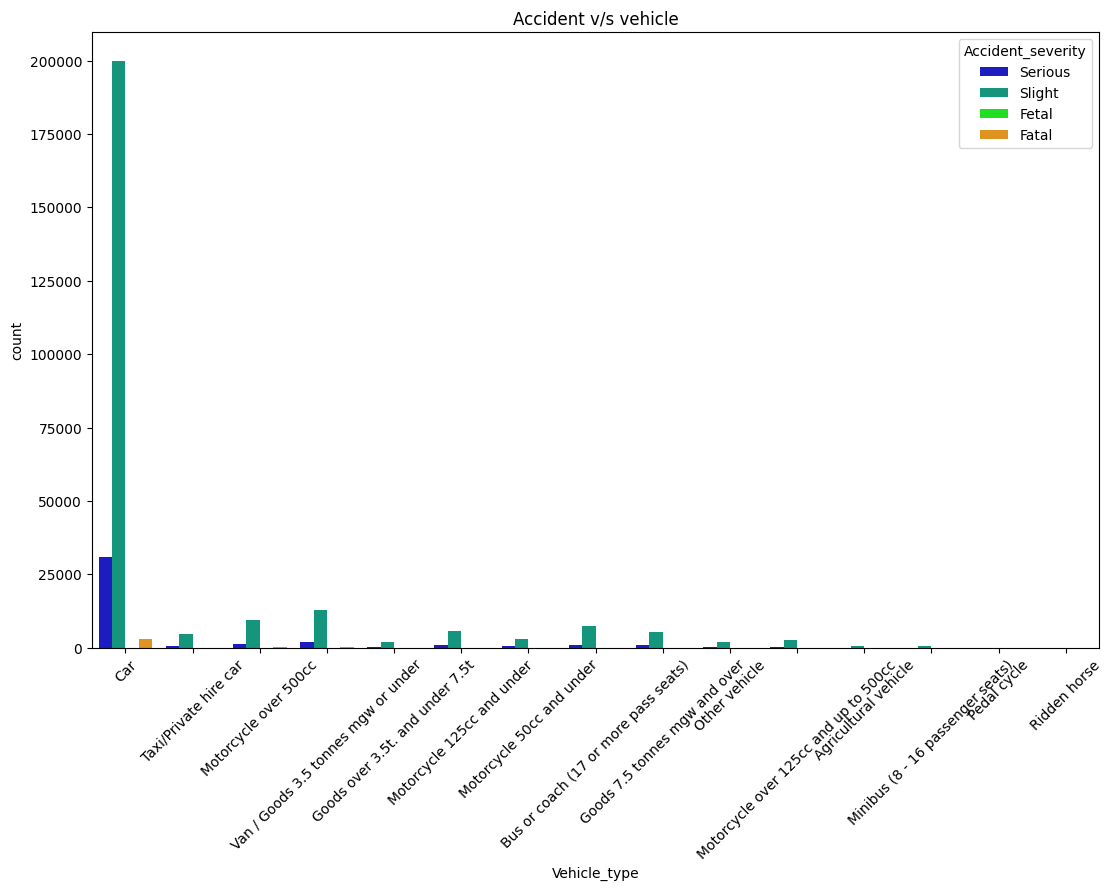

In [74]:

vehicle_accident_severity=df.groupby(['Vehicle_type','Accident_severity']).size()
print(vehicle_accident_severity)

plt.figure(figsize=(13, 8))
plt.title('Accident v/s vehicle')
sns.countplot(x='Vehicle_type', hue='Accident_severity', data=df, palette='nipy_spectral')
plt.xticks(rotation=45)


### Yes the vehicle type influences accident frequency and cars are the most accident prone vehicle 

## 10) which year has most accident?

Year
2021    159295
2022    141200
Name: count, dtype: int64 159295


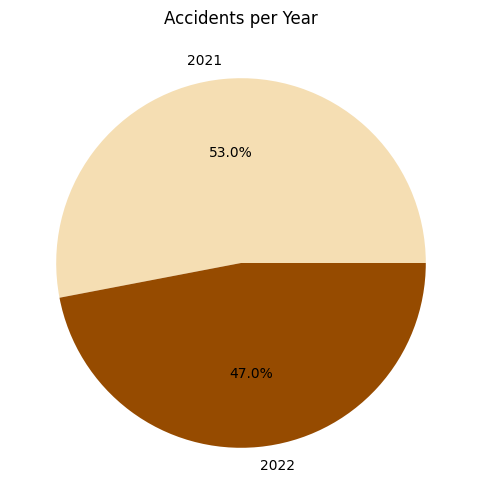

In [19]:


# Convert 'Date' column to datetime format
df['Accident_date'] = pd.to_datetime(df['Accident_date'])

# Extract year from 'Date' column
df['Year'] = df['Accident_date'].dt.year

# Count accidents per year
accidents_per_year = df['Year'].value_counts()

print(accidents_per_year, accidents_per_year.max())


plt.figure(figsize=(6, 6))
plt.pie(accidents_per_year.values, labels=accidents_per_year.index,colors=['#F5DEB3','#964B00','#786C3B'], autopct='%1.1f%%')
plt.title('Accidents per Year')
plt.show()




### 2021 had the highest number of accidents and the next year accident frequency is decreased  

 ## CONCLUSION
 
 Day of Week: Sunday has the least accidents, likely due to decreased traffic and holiday.
 Speed: Most accidents occur at relatively low speeds.
 Location: Urban areas have more accidents than rural areas due to increased traffic density, higher population density, and increased vehicle speed.
 Weather: Most accidents occur in fine, no-high-wind conditions, while fog/mist, raining, and snowing conditions have a slightly higher rate of serious accidents.
 Junction Control: Give-way or uncontrolled intersections have more accidents, while auto-traffic signals and authorized persons have fewer accidents.
 Vehicle Type: Cars are the most accident-prone vehicle.


Increasing speed limits leads to more accidents and Every junction control has accidents, but frequency varies.

2021 had the highest number of accidents.